In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
import os

# Import of keras model and hidden layers for our convolutional network
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
dir = '/content/drive/MyDrive/Body_pose_classes'

categories = ['stand' , 'duck', 'jump', 'punch', 'power','kick', 'throw']

In [5]:
image_data= []
for dr in os.listdir(dir):
  class_index= categories.index(dr)
  path= os.path.join(dir, categories[class_index])
  for img in os.listdir(path):
    img_arr= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    image_data.append([img_arr, class_index])

image_data[0]

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 1]

In [6]:
len(image_data)

3500

In [ ]:
import random
random.shuffle(image_data)

input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
    
label[:10]

[5, 3, 3, 5, 2, 5, 4, 3, 4, 4]

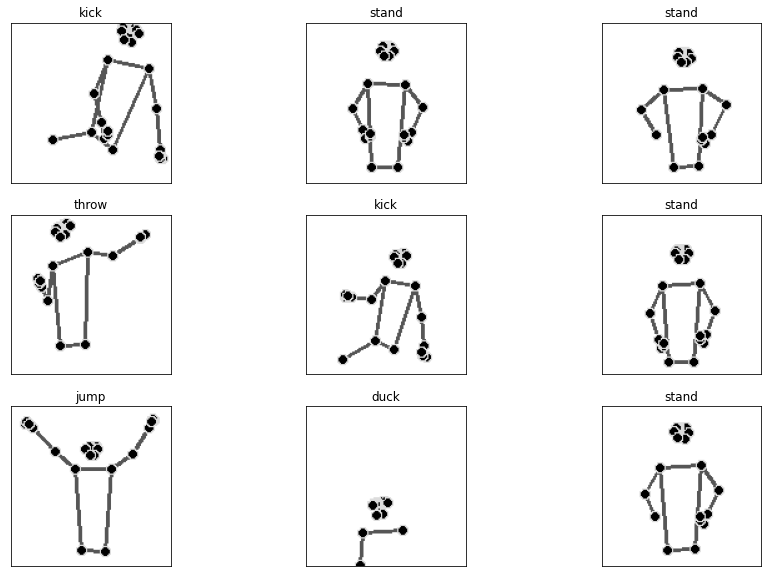

In [ ]:
plt.figure(1, figsize=(15,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]])
plt.show()

In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(3500, 128, 128)

In [ ]:
# one hot encoding
label = keras.utils.np_utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
# reshaping the data
input_data.shape = (-1, 128, 128, 1)

# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.2, random_state=0)

X_train.shape

(2800, 128, 128, 1)

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128, 128, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5, batch_size= 64, validation_split= 0.2)

Epoch 1/5
35/35 [==============================] - 114s 3s/step - loss: 2.2993 - accuracy: 0.6147 - val_loss: 0.0884 - val_accuracy: 0.9768
Epoch 2/5
35/35 [==============================] - 112s 3s/step - loss: 0.0959 - accuracy: 0.9723 - val_loss: 0.0321 - val_accuracy: 0.9929
Epoch 3/5
35/35 [==============================] - 113s 3s/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0361 - val_accuracy: 0.9929
Epoch 4/5
35/35 [==============================] - 112s 3s/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0286 - val_accuracy: 0.9875
Epoch 5/5
35/35 [==============================] - 113s 3s/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.0240 - val_accuracy: 0.9929


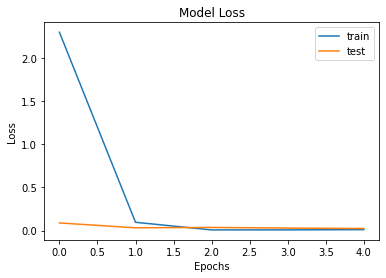

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

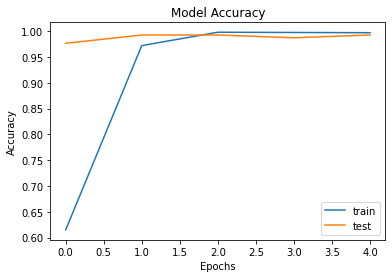

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

22/22 [==============================] - 8s 352ms/step - loss: 0.0161 - accuracy: 0.9971
Test accuracy: 99.71%


[]

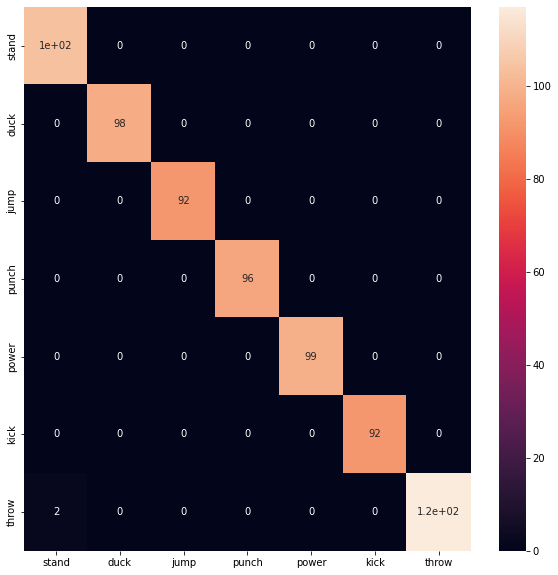

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c for c in categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

In [ ]:
model.save('Body_Pose_Model')